<a href="https://colab.research.google.com/github/krishyadav007/AI-detect-ghosts/blob/main/Ghost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to AI ghost detector

#### Please giv JPEG/JPG images only

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image, ImageOps
import matplotlib.pylab as plt

NG = 7

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

!wget https://github.com/krishyadav007/AI-detect-ghosts/raw/main/keras_model.h5
!wget https://github.com/krishyadav007/AI-detect-ghosts/raw/main/labels.txt

np.set_printoptions(suppress=True)
model = tensorflow.keras.models.load_model('/content/keras_model.h5')
df = pd.read_csv("labels.txt", sep = ' ')
df.drop(columns=df.columns[0], axis=1, inplace=True)
labels = df.values.tolist()

--2021-07-06 10:49:05--  https://github.com/krishyadav007/AI-detect-ghosts/raw/main/keras_model.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krishyadav007/AI-detect-ghosts/main/keras_model.h5 [following]
--2021-07-06 10:49:05--  https://raw.githubusercontent.com/krishyadav007/AI-detect-ghosts/main/keras_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2458616 (2.3M) [application/octet-stream]
Saving to: ‘keras_model.h5’

keras_model.h5      100%[===================>]   2.34M  12.8MB/s    in 0.2s    

2021-07-06 10:49:06 (12.8 MB/s) - ‘keras_model.h5’ saved [2458616/2458616]

--2021

In [2]:
from google.colab import files

uploaded = files.upload()

Saving HelloIMG1625499810354.jpeg to HelloIMG1625499810354.jpeg


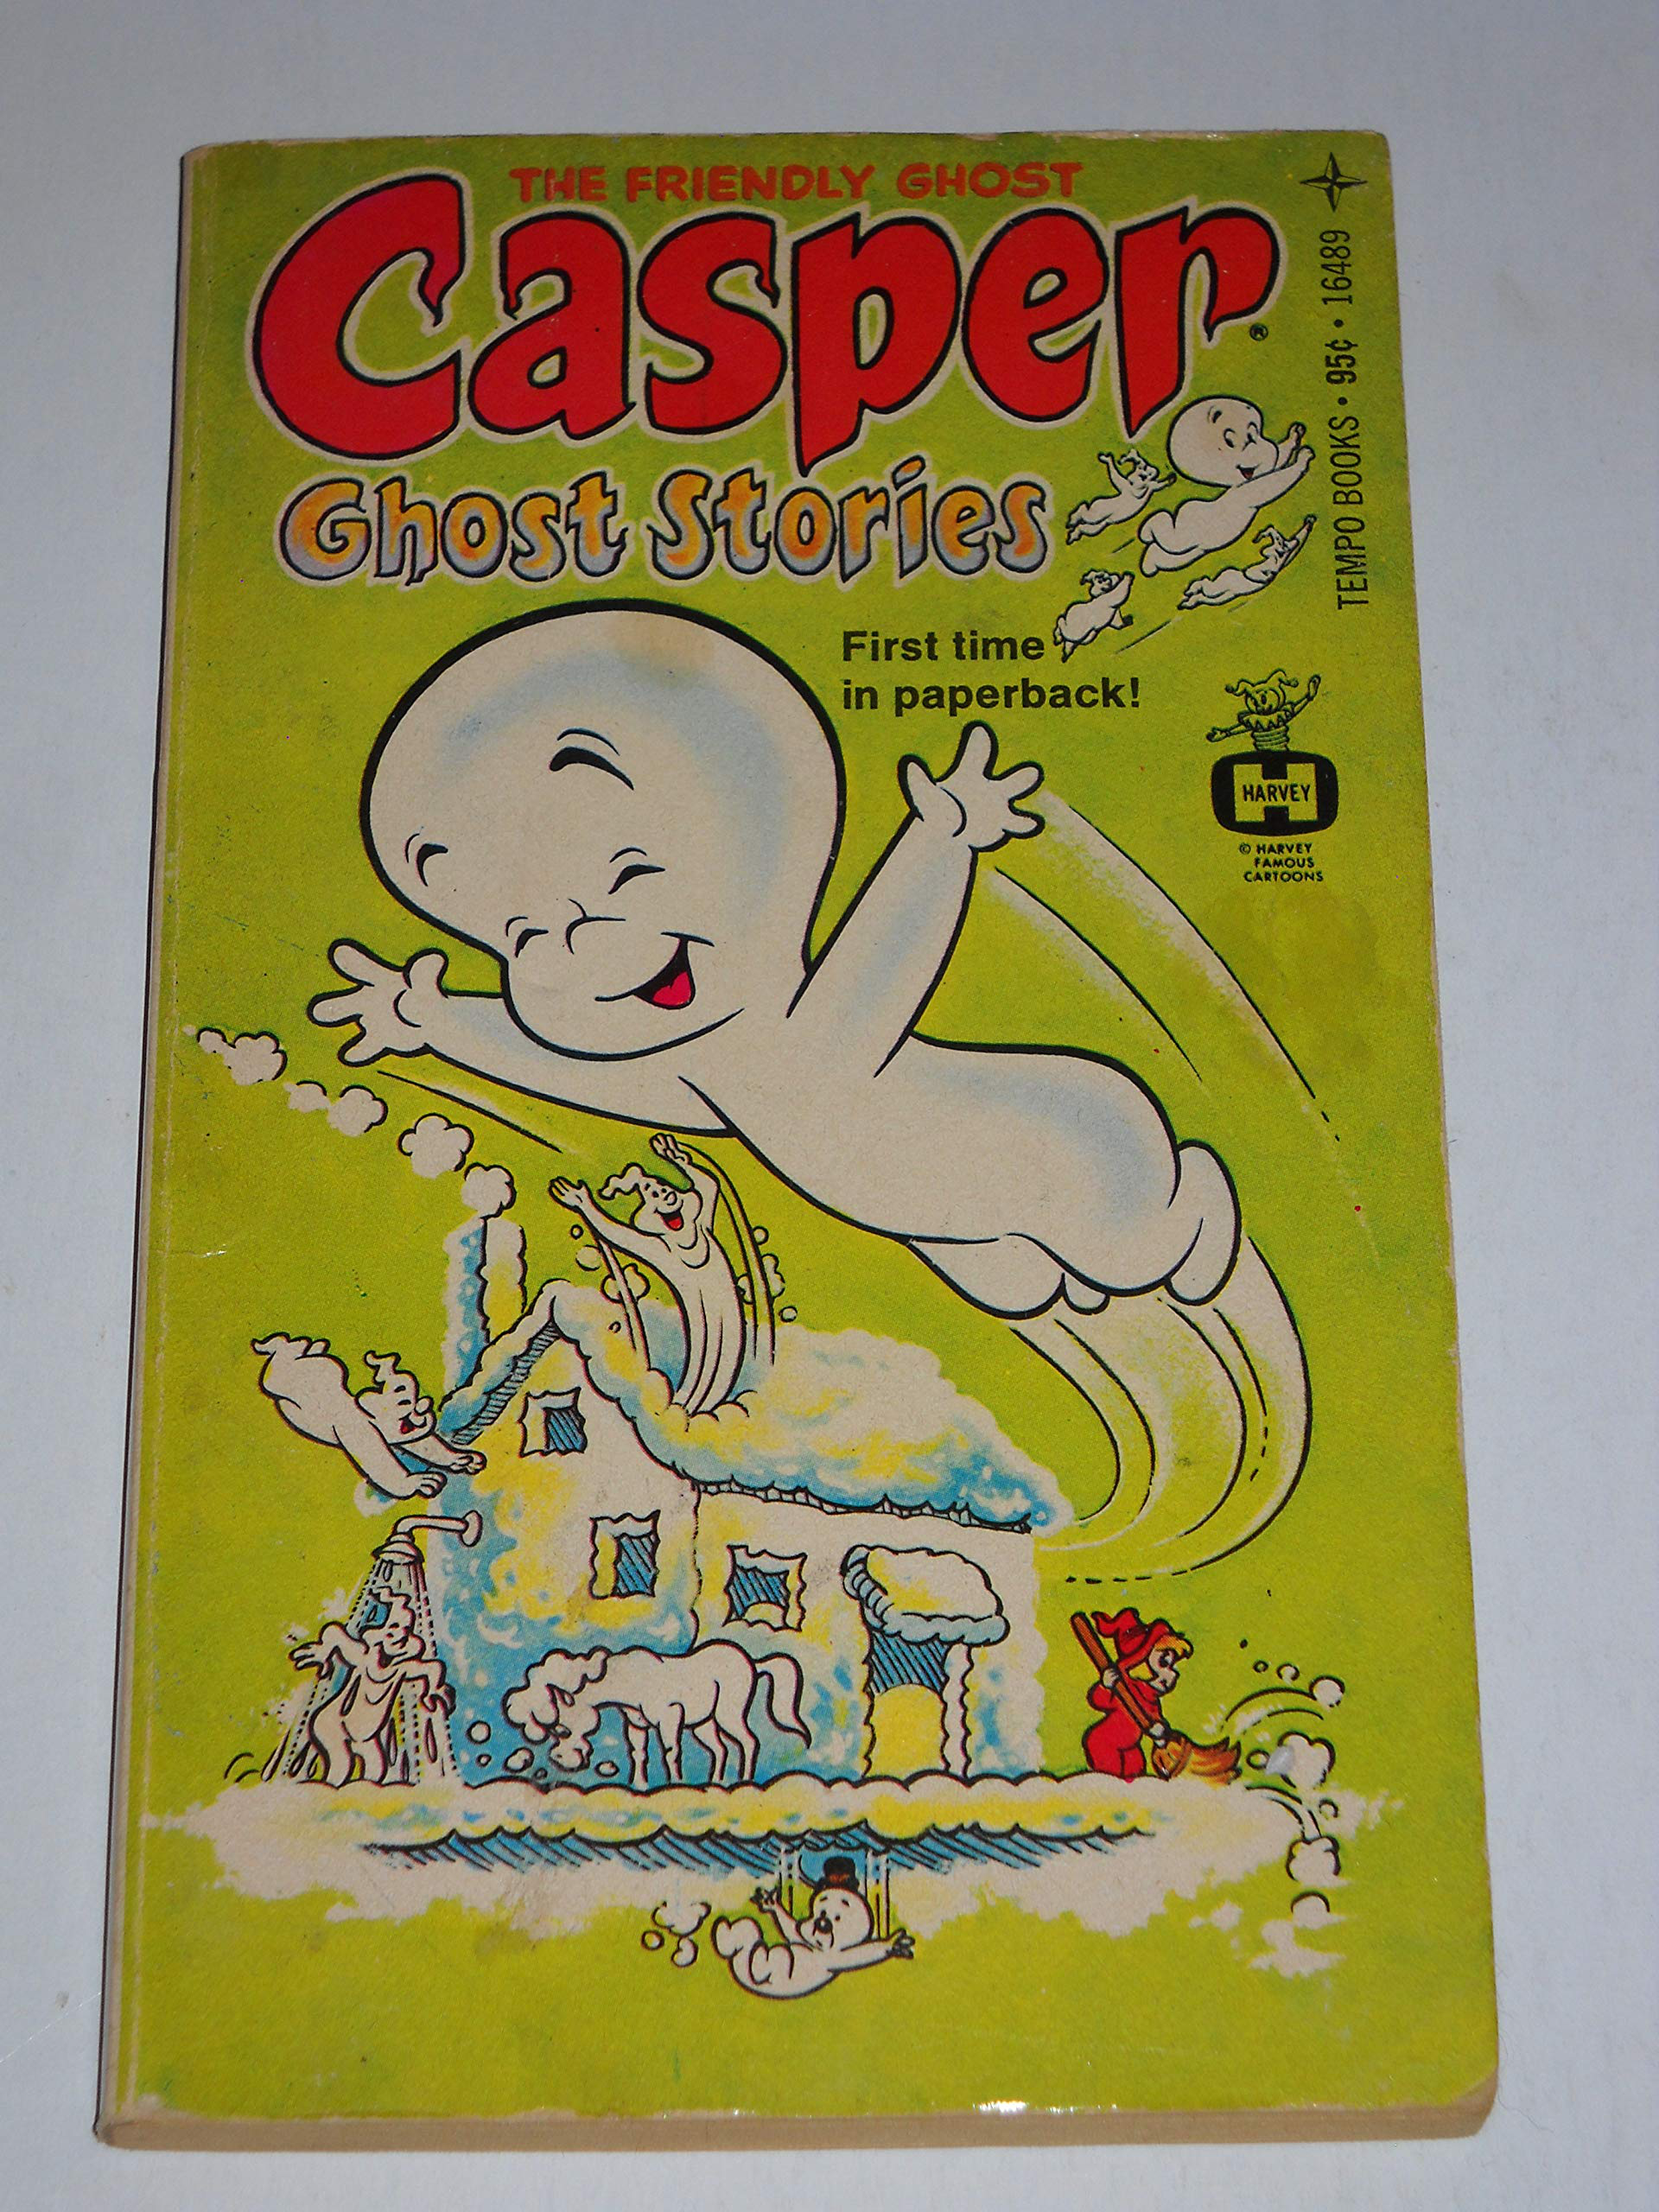

Name of image : HelloIMG1625499810354.jpeg
OMG, its ghost
Ghost name: Kasper
I am 99.394% sure 


In [3]:
for fn in uploaded.keys():
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  image = Image.open(fn)

  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  data[0] = normalized_image_array
  prediction = model.predict(data)
  prediction = prediction.tolist()

  image_todisplay = io.imread(fn) 
  image_todisplay = cv.cvtColor(image_todisplay, cv.COLOR_BGR2RGB)

  cv2_imshow(image_todisplay)
  print('Name of image : ' + fn)
  i = prediction[0].index(max(prediction[0]))

  if max(prediction[0]) > 0.50:
    if (i < NG):
      print('OMG, its ghost')
      print('Ghost name: ' + str(labels[i][0]))
    else:
      print('I feel it is ' + str(labels[i][0]))
    print("I am " + str(round(max(prediction[0])*100,3)) + "% sure ")
  else:
    print('No ghost here')